# Numerisk Prosjekt i Bølge- og fluidmekanikk (TFY4163)
##### Av Muhammad Mohsin Mumtaz og Oliver Briskeby Stubban
Dato: 28.03.2025

Hei, dette er vår besvarelse av numerisk prosjekt i TFY4163.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

parameters = {
    "l": 1,  # m - Lengden av snora
    "g": 9.8,  # m/s^2 - Tyngdeakselerasjon
    "theta_0": 0.2,  # rad - Initial vinkel med hensyn til vertikalen
    "theta_dot_0": 0.0,  # rad/s - Initial vinkelhastighet
    "q": 1.0,  # Hz - Friksjonsparameter
    "omega_D": 3.13,  # rad/s - FD_mlens vinkelfrekvens
    "FD_ml": 0.2,  # s^-2 - FD_ml
    "T": 20 # s - Tidsintervall
}


### Oppgave 1:
Bruk fjørne ordenens Runge-Kutta (RK4) metiden fir å løse bevegelseslikningen. Plot vinkelutslaget som funksjon av tid, opp til $t = 20s$. Bruk tidssteg $\Delta t = 0.01s$

In [2]:

plotparams = {'figure.figsize': (18, 9), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 25, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}

plt.rcParams.update(plotparams) 

def equation(t, params, vals): 
    """
    Computes the RHS of the differential equations.

    Parameters:
    t (float): Time.
    params (dict): Swinging motion parameters (l, g, theta_0, theta_dot_0, q, omega_D, FD_ml, T).
    vals (array): Current values [theta, omega].

    Returns:
    numpy.ndarray: RHS values [dtheta, domega].
    """

    l, g, theta_0, theta_dot_0, q, omega_D, FD_ml, T = params.values()
    
    theta, omega = vals
    dtheta = omega
    domega = -q * omega - (g/l) * theta + FD_ml * np.sin(omega_D*t) #Endringer her siden det er flere variabler
    return np.array([dtheta, domega])

def RK4_step(RHS, params, vals, t, dt):
    """
    Performs one RK4 step.

    Parameters:
    RHS (callable): Function for the RHS of the equations.
    params (dict): Swinging motion parameters.
    vals (array): Current values [theta, omega].
    t (float): Current time.
    dt (float): Time step.

    Returns:
    numpy.ndarray: Next values [theta_next, omega_next].
    """

    k1 = RHS(t, params, vals)   
    k2 = RHS(t+dt/2, params, vals+(dt/2)*k1)
    k3 = RHS(t+dt/2, params, vals+(dt/2)*k2)
    k4 = RHS(t+dt, params, vals+dt*k3)
    return vals + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(RHS, params, dt):
    """
    Solves the equations using the RK4 method.

    Parameters:
    RHS (callable): Function for the RHS of the equations.
    params (dict): Swinging motion parameters.
    dt (float): Time step.

    Returns:
    tuple: Arrays of theta, omega, and time values.
    """
    
    l, g, theta_0, theta_dot_0, q, omega_D, FD_ml, T = params.values()

    n = int(float(T)/dt) # number of iterations
    t = np.linspace(0, T, n + 1)
    theta, w = np.zeros(n+1), np.zeros(n+1)
    theta[0], w[0] = theta_0, theta_dot_0
    
    for i in range(n):
        theta[i+1], w[i+1] = RK4_step(RHS, params, np.array([theta[i], w[i]]), t[i], dt) 
        # Calculates values of theta and omega using RK4-method
        
    return theta, w, t

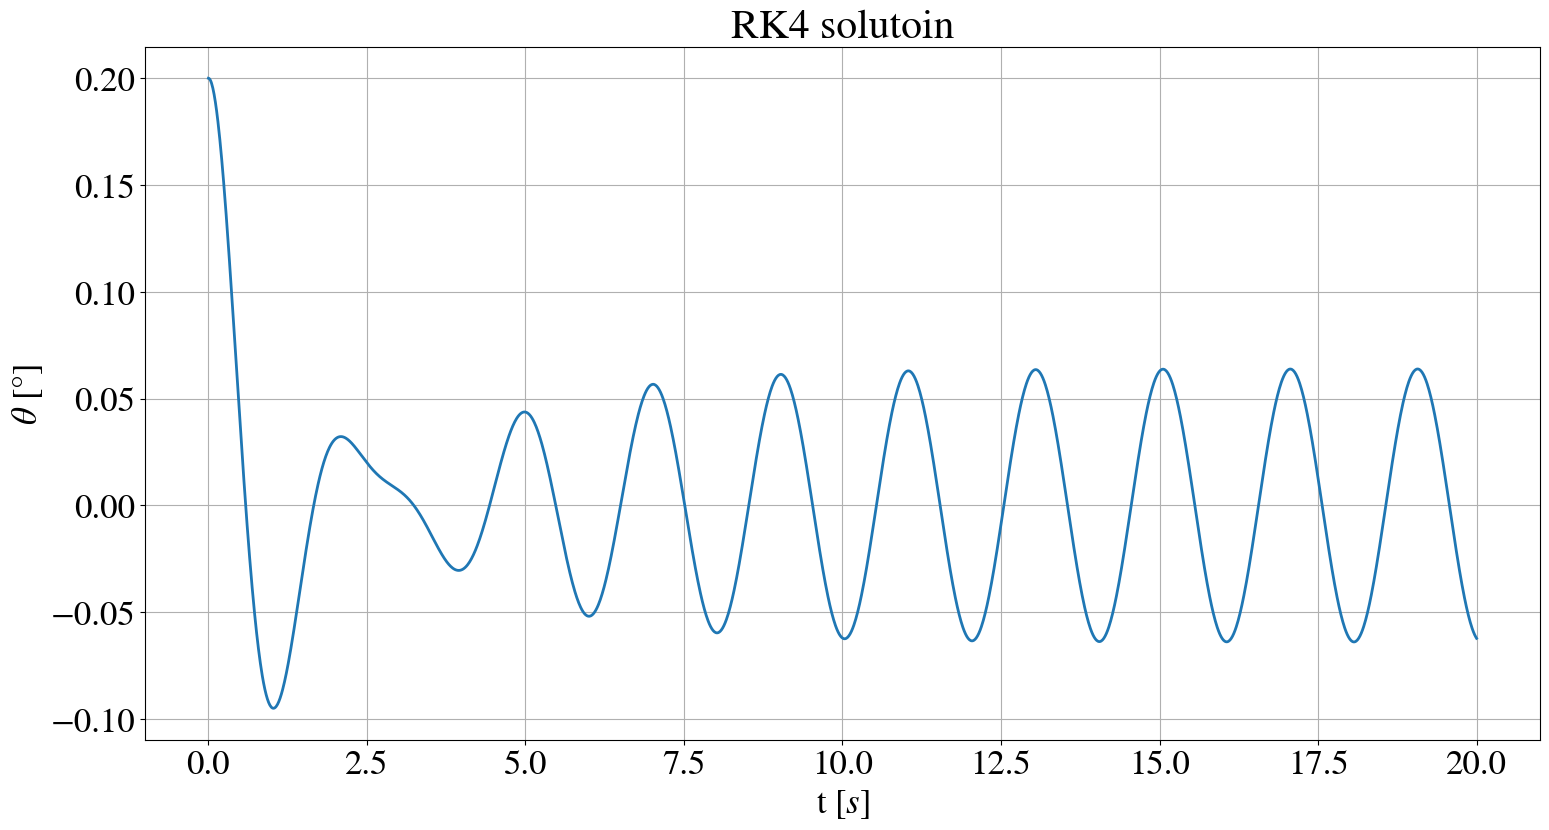

In [ ]:
theta_R, w_r, t = RK4_method(equation, parameters, dt=0.01)

plt.plot(t, theta_R)
plt.title('RK4 Solution')
plt.xlabel(r't $[s]$')
plt.ylabel(r'$\theta$ $[\degree]$')
plt.grid()
plt.show()

Her bruker vi en del kode fra numerisk øving 3, men endrer på equation() funksjonen sånn at den løser for vårt system. Vi anvender også en annerledes måte å håndtere initialparametere slik at vi kan senere (i oppgave 3-5) endre på disse parameterene. 

### Oppgave 2:
Finn en passende steglengde, $\Delta t$, ved å utføre en konvergenstest av løsningen fra RK4-metoden. Utfør den samme konvergenstesten for Euler-Cromer metoden, som du også må implementere. Plot de to konvergenstestene i hver sin figur. Vurder ut fra konvergenstesten om tidssteget brukt i oppgave 1 var tilstrekkelig. Merk at energien $\textit{ikke}$ vil være bevart i dette systemet.

In [4]:
def euler_cromer_step(RHS, params, vals, t, dt):
    """
    Performs one step of the Euler-Cromer algorithm.

    Parameters:
    RHS (callable): Function for the RHS of the equations.
    params (dict): Swinging motion parameters.
    vals (list): Current values [theta, omega].
    t (float): Current time.
    dt (float): Time step.

    Returns:
    tuple: Next values [theta_next, omega_next].
    """

    w_next = vals[1] + RHS(t, params, vals)[1] * dt
    theta_next = vals[0] + w_next * dt # uses w_next instead of w

    return theta_next, w_next

def euler_cromer(RHS, params, dt):
    """
    Solves the equations using the Euler-Cromer method.

    Parameters:
    RHS (callable): Function for the RHS of the equations.
    params (dict): Swinging motion parameters.
    dt (float): Time step.

    Returns:
    tuple: Arrays of theta, omega, and time values.
    """
    
    l, g, theta_0, theta_dot_0, q, omega_D, FD_ml, T = params.values()


    n = int(float(T)/dt) # number of iterations
    t = np.linspace(0, T, n + 1)
    theta, w = np.zeros(n+1), np.zeros(n+1)
    theta[0], w[0] = theta_0, theta_dot_0

    for i in range(n):
        theta[i+1], w[i+1] = euler_cromer_step(RHS, params, [theta[i], w[i]], t[i], dt)


    return theta, w, t



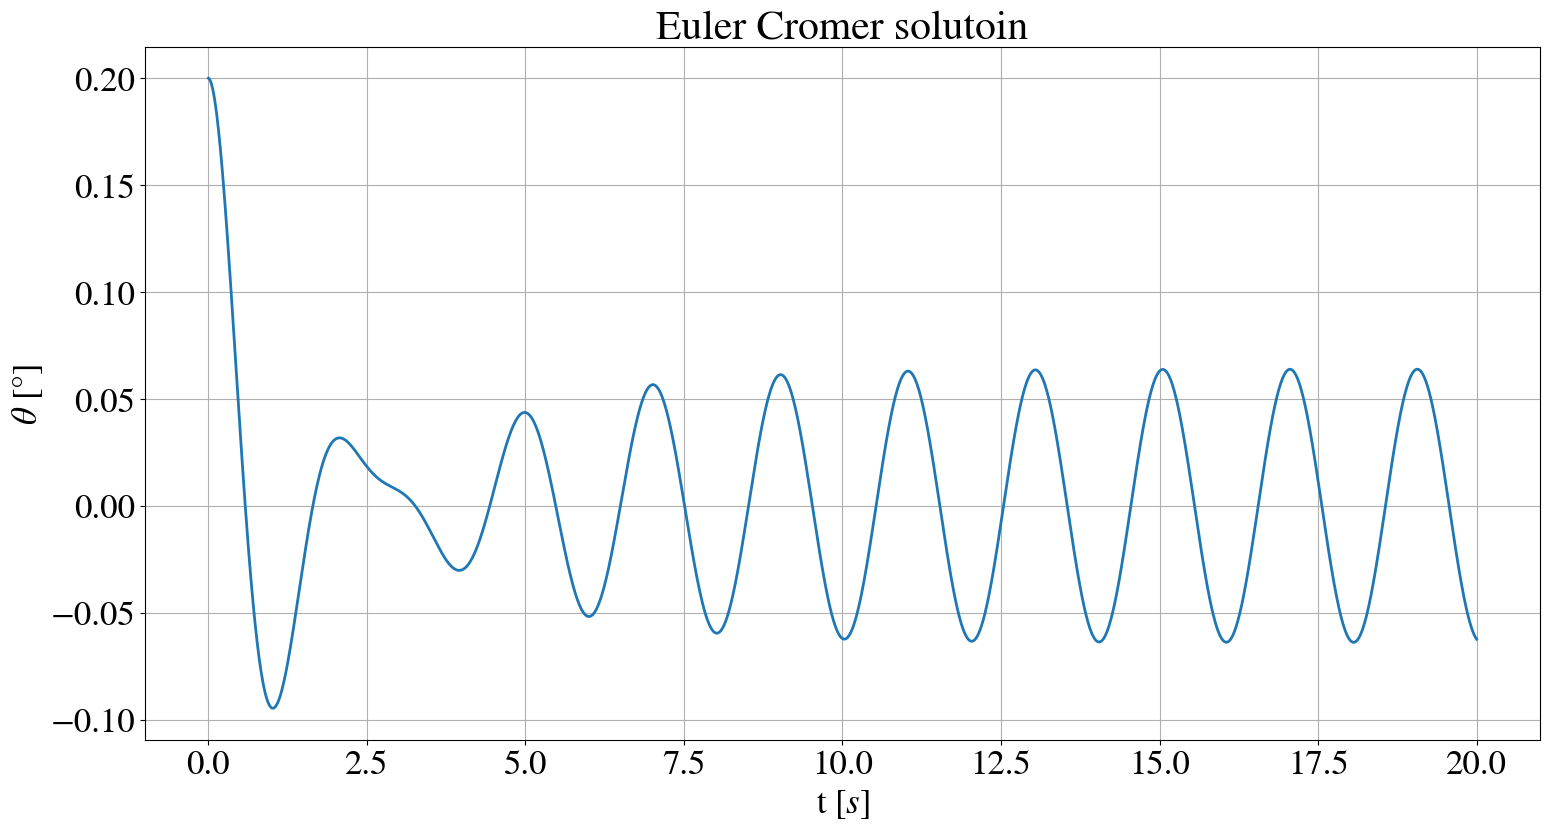

In [5]:
theta_R, w_r, t = euler_cromer(equation, parameters, dt=0.01)

plt.plot(t, theta_R)
plt.title(f'Euler Cromer solutoin')
plt.xlabel(r't $[s]$')
plt.ylabel(r'$\theta$ $[\degree]$')
plt.grid()
plt.show()

Koden over gjør tilsvarende som i oppgave 1, bare med Euler-Cromer-metoden. Figuren over viser Euler-Cromer-metoden for de samme parameterene som i oppgave 1.

In [6]:
def generate_solutions(method, RHS, params, dt_max, dt_min, N):
    """
    Generates N solutions for the system using a specified method.

    Parameters:
    method (callable): Method for solving the system.
    RHS (callable): Function representing the RHS of the equations.
    params (dict): Parameters for the method.
    dt_max (float): Maximum time step.
    dt_min (float): Minimum time step.
    N (int): Number of solutions to generate.

    Returns:
    tuple: List of solutions and corresponding dt-values.
    """

    l, g, theta_0, theta_dot_0, q, omega_D, FD_ml, T = params.values()

    sols = []
    dts = np.logspace(np.log10(dt_max),np.log10(dt_min), N)
    dts = np.linspace(dt_max,dt_min, N)
    
    for dt in dts:
        sols.append(method(RHS, params, dt))
    return sols, dts


def compare_thetas(sol1, sol2):
    """
    Compares two solutions by interpolating and calculating similarity.

    Parameters:
    sol1 (tuple): First solution (theta, omega, t).
    sol2 (tuple): Second solution (theta, omega, t).

    Returns:
    float: Similarity score (mean absolute error).
    """

    if len(sol1[0])<len(sol2[0]):
        theta_1, _, t_1 = sol1
        theta_2, _, t_2 = sol2
    else:
        theta_1, _, t_1 = sol2
        theta_2, _, t_2 = sol1

    theta_1 = np.interp(t_2, t_1, theta_1)

    return np.mean(np.abs(theta_1-theta_2)) # return np.max(np.abs(theta_1-theta_2))

    
def compare_solutions(sols, dts):
    """
    Compares multiple solutions and calculates similarity scores.

    Parameters:
    sols (list): List of solutions (theta, omega, t).
    dts (list): List of dt-values.

    Returns:
    numpy.ndarray: Similarity scores for consecutive solutions.
    """

    scores = np.zeros(len(dts)-1)

    for i in range(len(dts)-1):
        scores[i] = compare_thetas(sols[i],sols[i+1])
        
    return scores

    
def convergence_test(method, RHS, params, dt_max, dt_min, N):
    """
    Performs a convergence test and plots the results.

    Parameters:
    method (callable): Method for solving the system.
    RHS (callable): Function representing the RHS of the equations.
    params (dict): Parameters for the method.
    dt_max (float): Maximum time step.
    dt_min (float): Minimum time step.
    N (int): Number of solutions to generate.

    Returns:
    None
    """

    sols, dts = generate_solutions(method, RHS, params, dt_max, dt_min, N)
    scores = compare_solutions(sols, dts)
    plt.plot(dts[1:], scores)
    ax = plt.gca()
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.title(f'Convergence of {method.__name__} when '+ r'$\Delta t \rightarrow 0$')
    plt.xlabel(r'$\Delta t [s]$')
    plt.ylabel(r'$\frac{\Delta MAE}{\Delta t}$')
    plt.grid()
    plt.show()


    


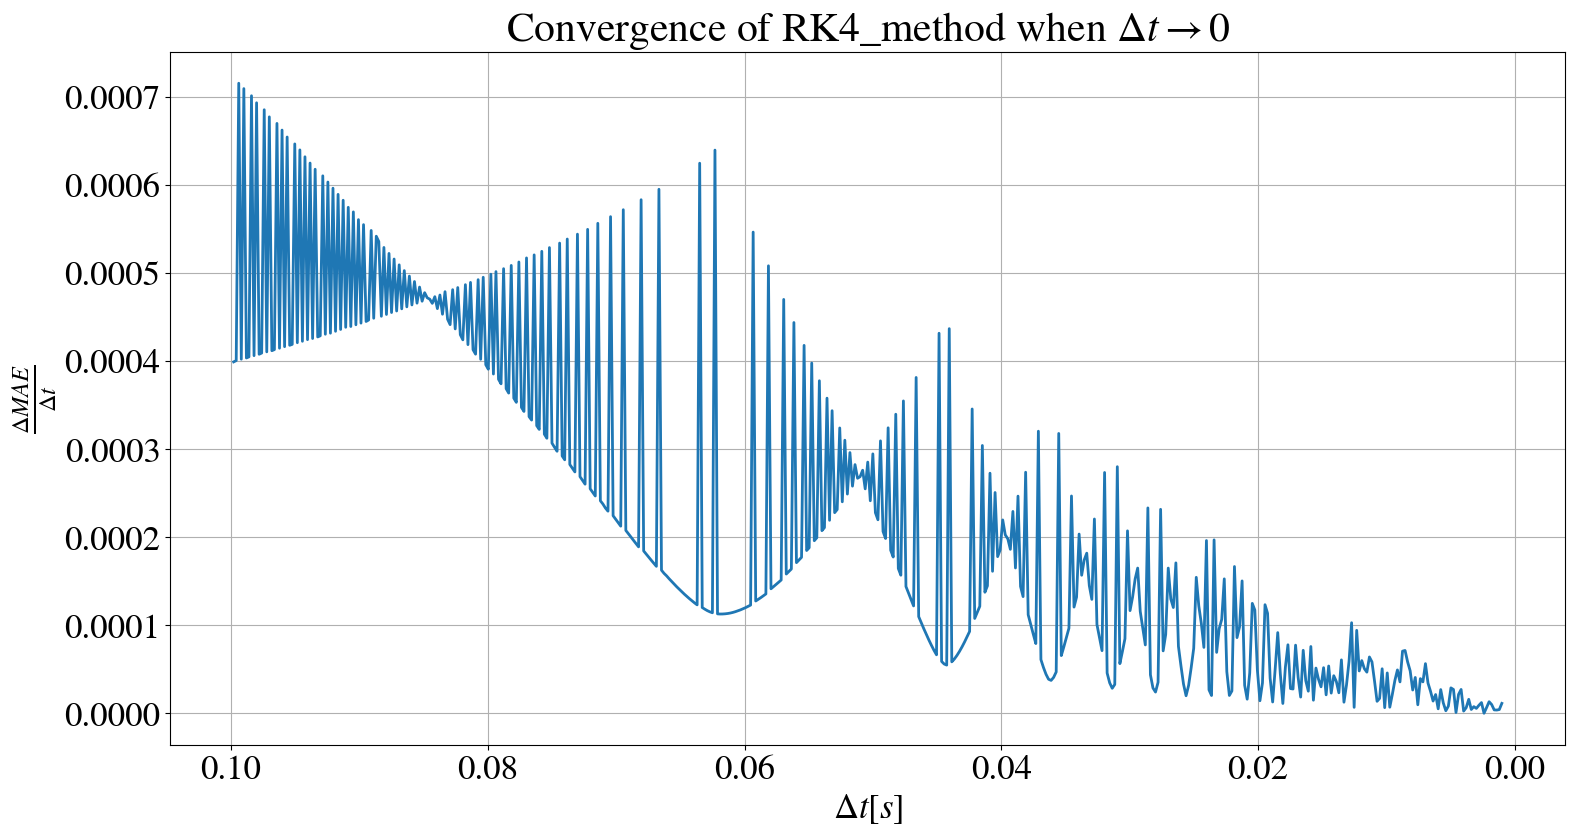

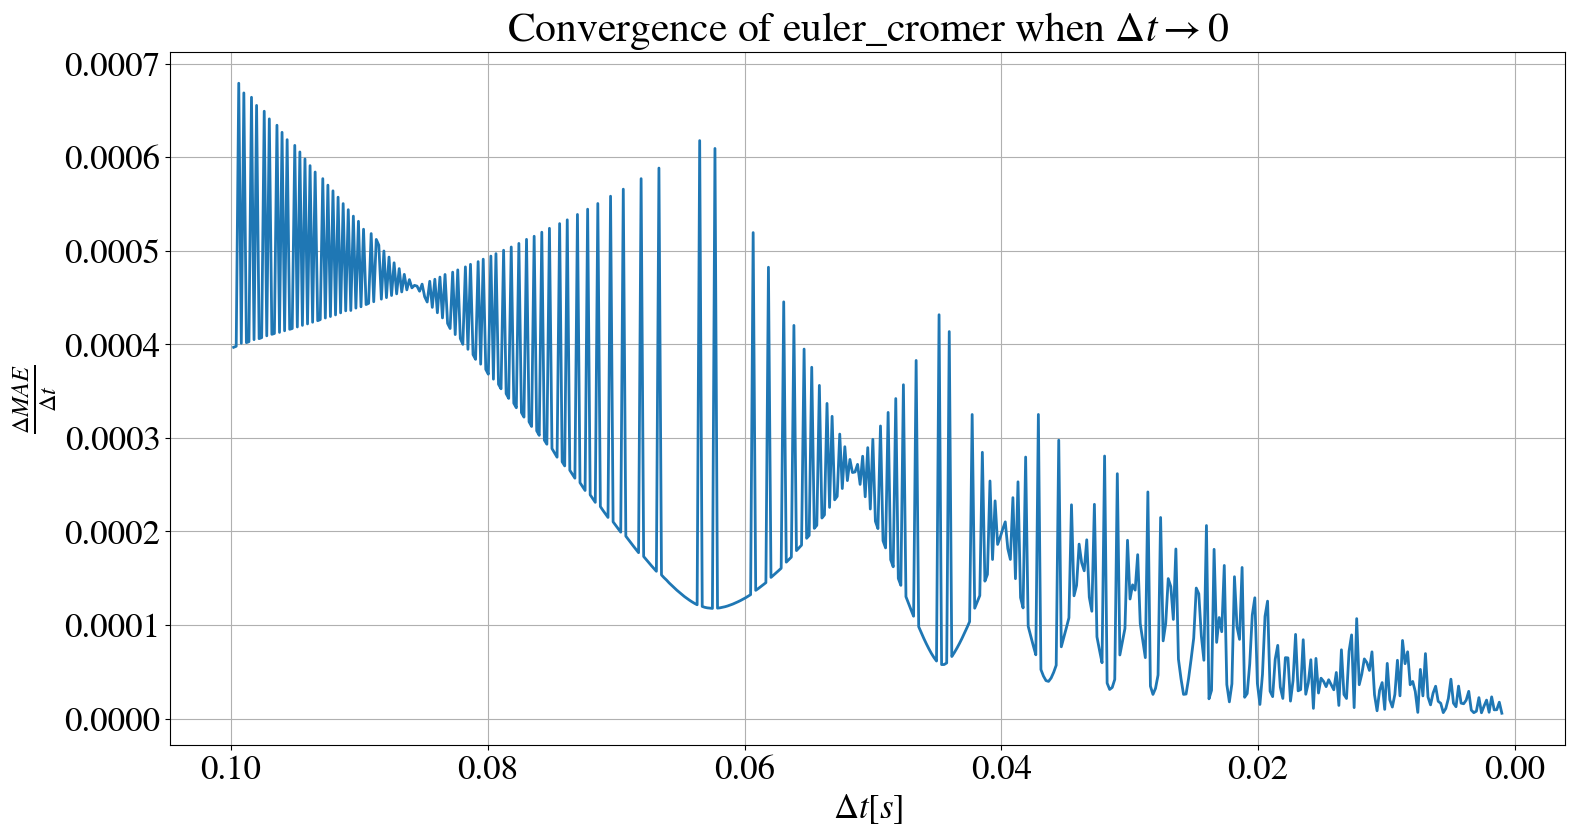

In [14]:
params = {
    "l": 1,  # m - Lengden av snora
    "g": 9.8,  # m/s^2 - Tyngdeakselerasjon
    "theta_0": 0.2,  # rad - Initial vinkel med hensyn til vertikalen
    "theta_dot_0": 0.0,  # rad/s - Initial vinkelhastighet
    "q": 1.0,  # Hz - Friksjonsparameter
    "omega_D": 3.13,  # rad/s - FD_mlens vinkelfrekvens
    "FD_ml": 0.2,  # s^-2 - FD_ml
    "T": 20 # s - Tidsintervall
}

dt_max = 0.1
dt_min = 0.001
N = 500
convergence_test(RK4_method, equation, params, dt_max, dt_min, N)
convergence_test(euler_cromer, equation, params, dt_max, dt_min, N)

Koden over utfører mange løsninger av systemet for ulike $\Delta t$, og sammenligner løsningene for $\Delta t_{i}$ og $\Delta t_{i-1}$ for å måle konvergensen. Fra plottene ser det ut til at både Euler-Cromer og RK4 konvergerer når $\Delta t$ går mot 0.

### Oppgave 3:

Undersøk hvordan utslaget avhenger av drivfrekvensen $\omega_D$. Plot vinkelutslaget for minst fem ulike verdier av $\omega_D$, som du mener viser denne sammenhengen.

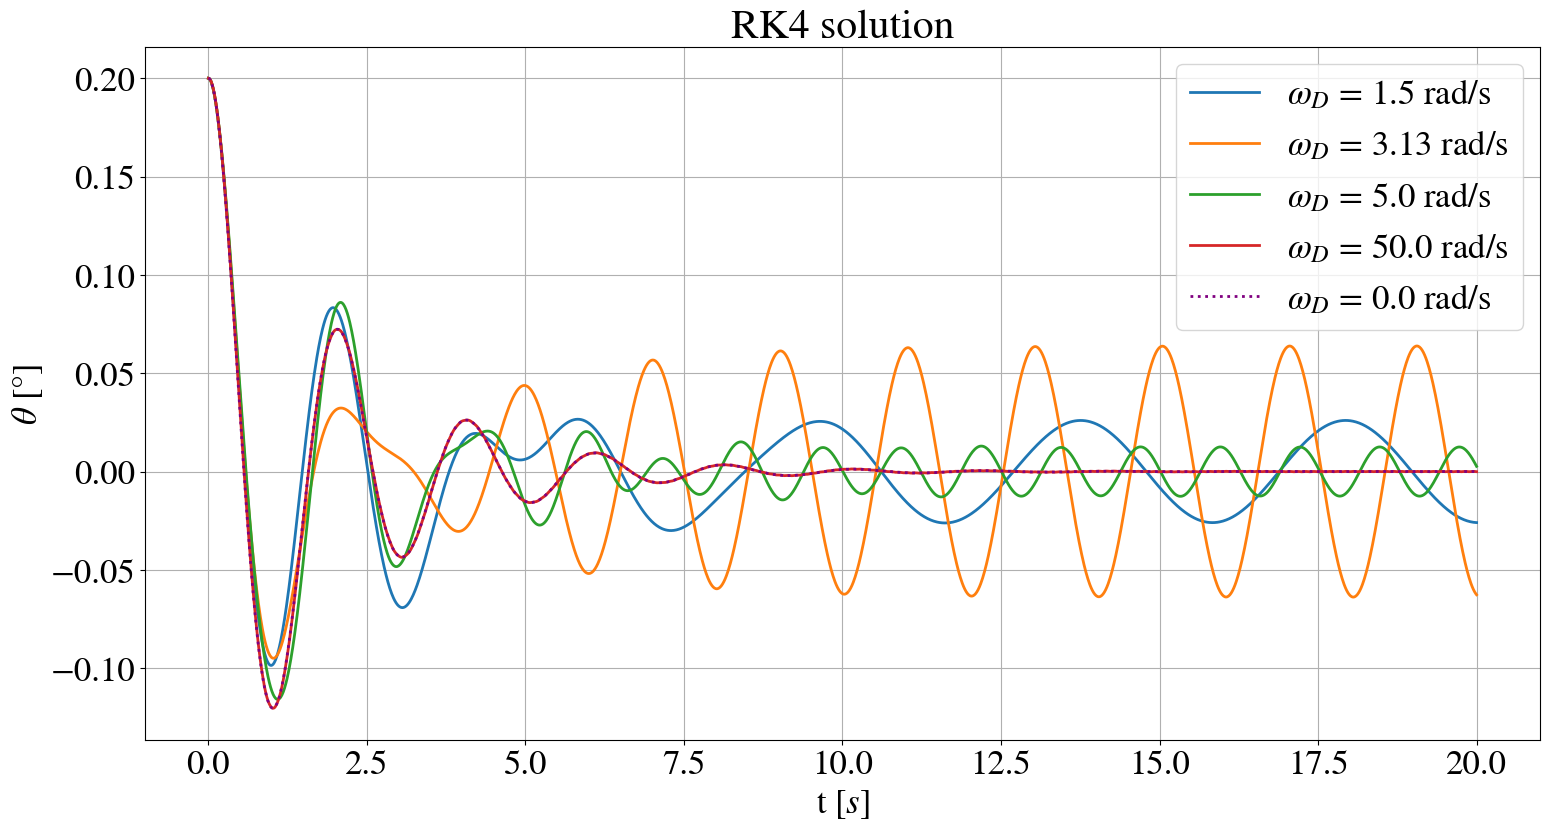

In [8]:
omega_D = np.array([0, 1.5, np.sqrt(9.81), 5, 50]) #Velger 4 ulike verdier for omega_D

parameters = {
    "l": 1,  # m - Lengden av snora
    "g": 9.8,  # m/s^2 - Tyngdeakselerasjon
    "theta_0": 0.2,  # rad - Initial vinkel med hensyn til vertikalen
    "theta_dot_0": 0.0,  # rad/s - Initial vinkelhastighet
    "q": 1.0,  # Hz - Friksjonsparameter
    "omega_D": 3.13,  # rad/s - FD_mlens vinkelfrekvens
    "FD_ml": 0.2,  # s^-2 - FD_ml
    "T": 20 # s - Tidsintervall
}

val = [] # lagrer data for hver omega_D
for i in omega_D: 
    parameters["omega_D"] = i
    theta_R, w_r, t = RK4_method(equation, parameters, dt=0.01)
    val.append((theta_R, w_r))
    

for i in range(1, len(omega_D)): # plot alle 5 omega_D verdier
    plt.plot(t, val[i][0], label=r"$\omega_D$ = "+str(round(omega_D[i], 2)) + " rad/s")
plt.plot(t, val[0][0], label=r"$\omega_D$ = "+str(round(omega_D[0], 2)) + " rad/s", ls="dotted", color="purple")

plt.title('RK4 solution')
plt.xlabel(r't $[s]$')
plt.ylabel(r'$\theta$ $[\degree]$')
plt.legend()
plt.grid()
plt.show()

#### Forklaring av kode:

Her valgte vi ulike $\omega_D$ verdier: $[0, 0.2, \sqrt{\frac{g}{l}}, 5, 50]$ (der g = 9.81 $m s^{-2}$ og l = 1 $m$)

Valg av $\sqrt{\frac{g}{l}}$ (grønn linje) er fordi det er for den verdien vi får resonans. Drivkraften bidrar nå til å forsterke utslaget. 

Ved $\omega_D = 0$ $\frac{rad}{s}$ og $\omega_D = 50$ $\frac{rad}{s}$  ser vi at de holder seg rett og slett på hverandre. Dette skyldes at større frekvens enn frekvenser rundt resonansfrekvensen gjør det sånn at det blir 0 bidrag til systemet og dermed tilsvarer høye verdier av $\omega_D$ til at drivkraften rett og slett ikke er der ($\omega_D = 0 \Rightarrow \frac{F_D}{ml}\cdot\sin(\omega_D \cdot t)=0$)

$\omega_D = 5$ $\frac{rad}{s}$ og $\omega_D = 1.5$ $\frac{rad}{s}$ viser at verdier som ligger særdeles nær resonansfrekvenser gir et utslag, men det er ikke så særlig stort.

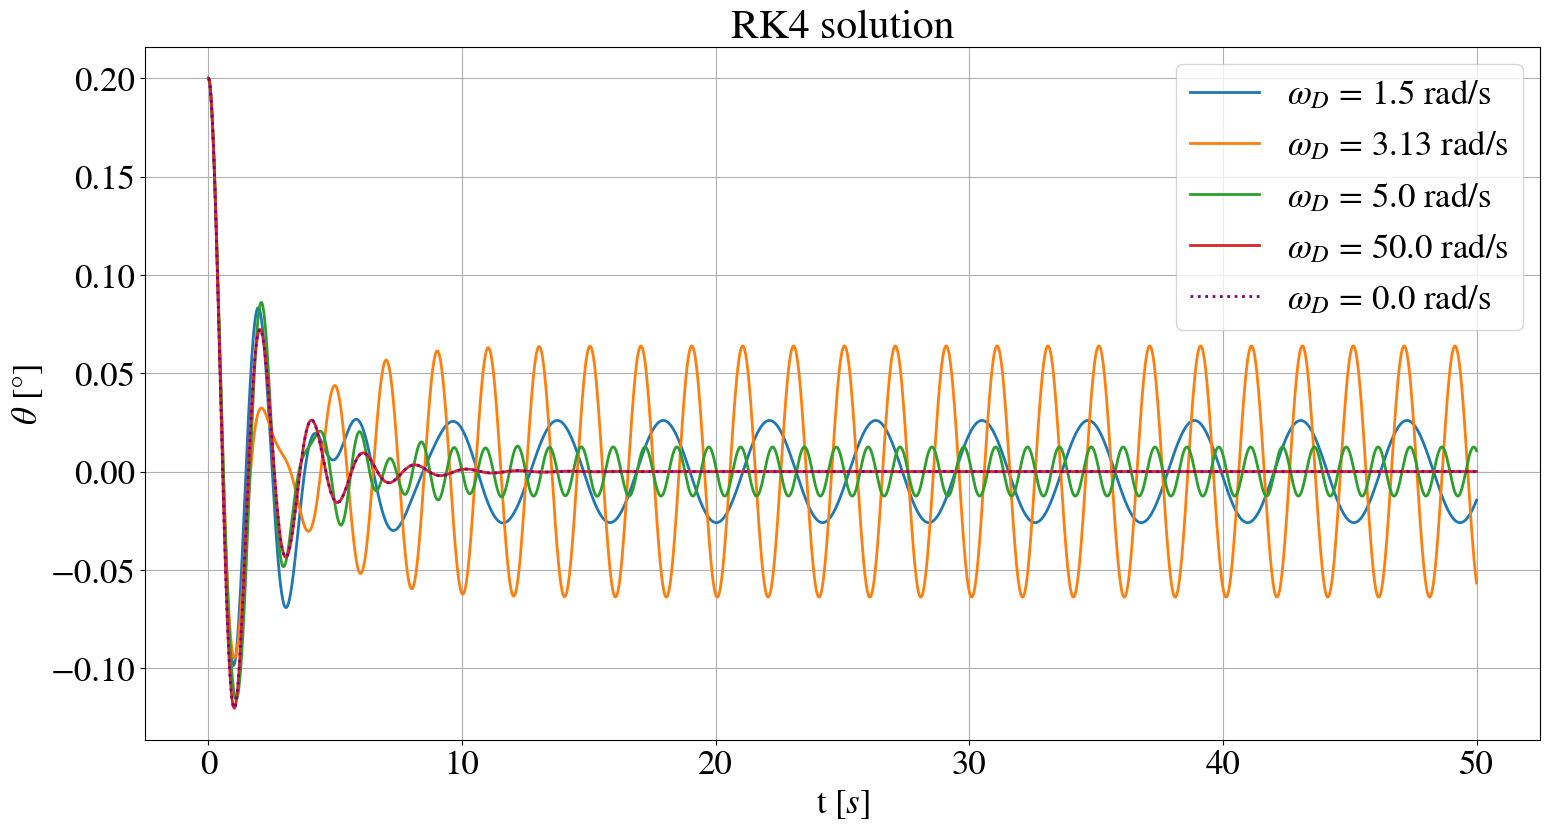

In [9]:
parameters["T"] = 50 #s

val = [] # lagrer data for hver omega_D
for i in omega_D: 
    parameters["omega_D"] = i
    theta_R, w_r, t = RK4_method(equation, parameters, dt=0.01)
    val.append((theta_R, w_r))
    

for i in range(1, len(omega_D)): # plot alle 5 omega_D verdier
    plt.plot(t, val[i][0], label=r"$\omega_D$ = "+str(round(omega_D[i], 2)) + " rad/s")
plt.plot(t, val[0][0], label=r"$\omega_D$ = "+str(round(omega_D[0], 2)) + " rad/s", ls="dotted", color="purple")
plt.title('RK4 solution')
plt.xlabel(r't $[s]$')
plt.ylabel(r'$\theta$ $[\degree]$')
plt.legend()
plt.grid()
plt.show()

Her bruker vi en lengre tidsintervall (T=50s), som viser at disse resonansfrekvens verdiene konvergerer mot en maks utslag etter en viss tid har gått.

### Oppgave 4:
Undersøk hvordan resonansamplituden avhenger av friksjonsparameteren, $\textit{q}$. Plot vinkelutslaget for minst fem ulike verdier av $\textit{q}$, som du mener viser denne sammen-hengen

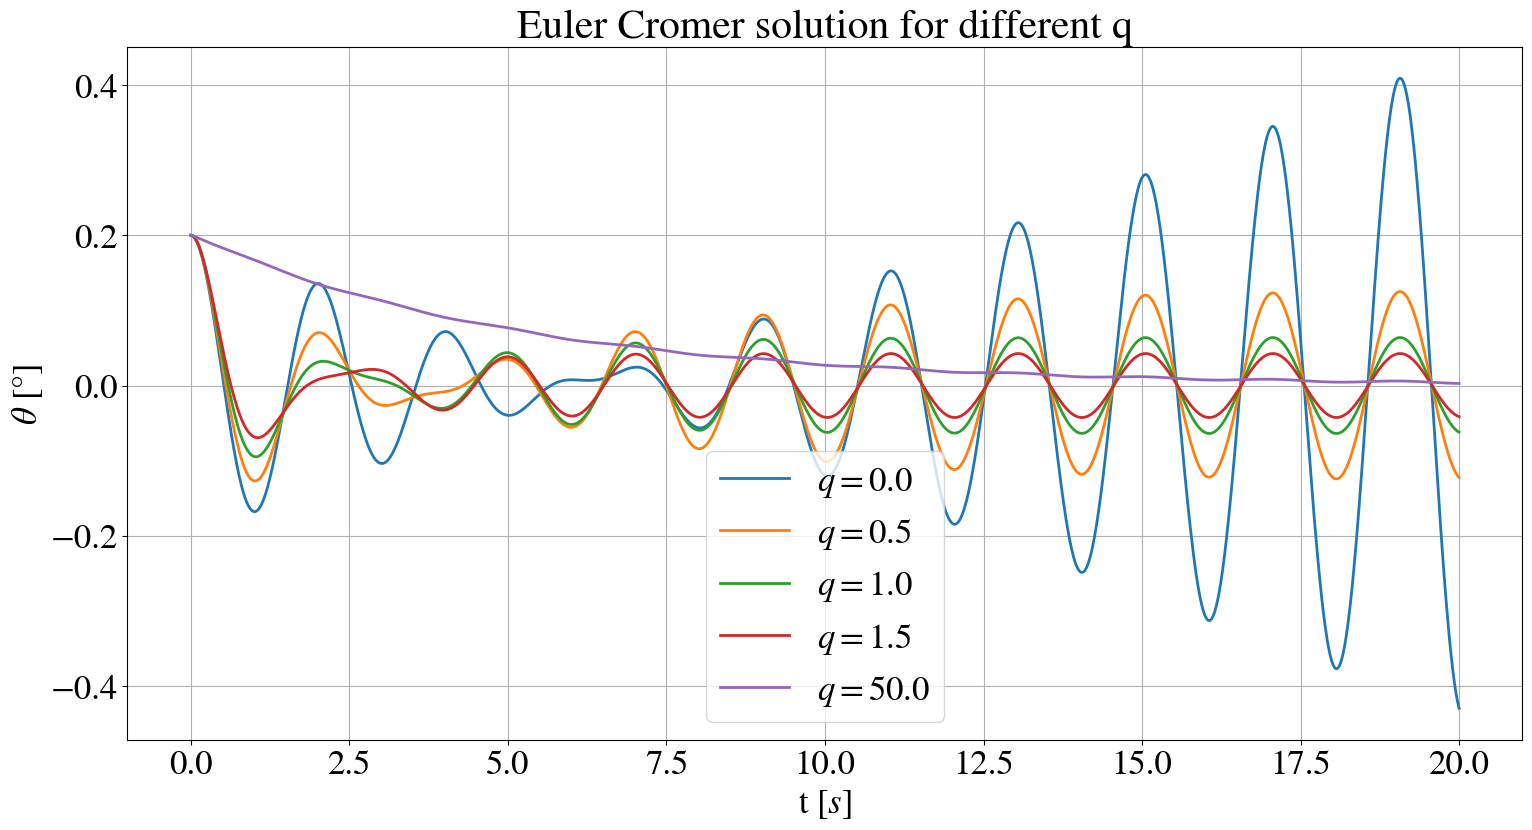

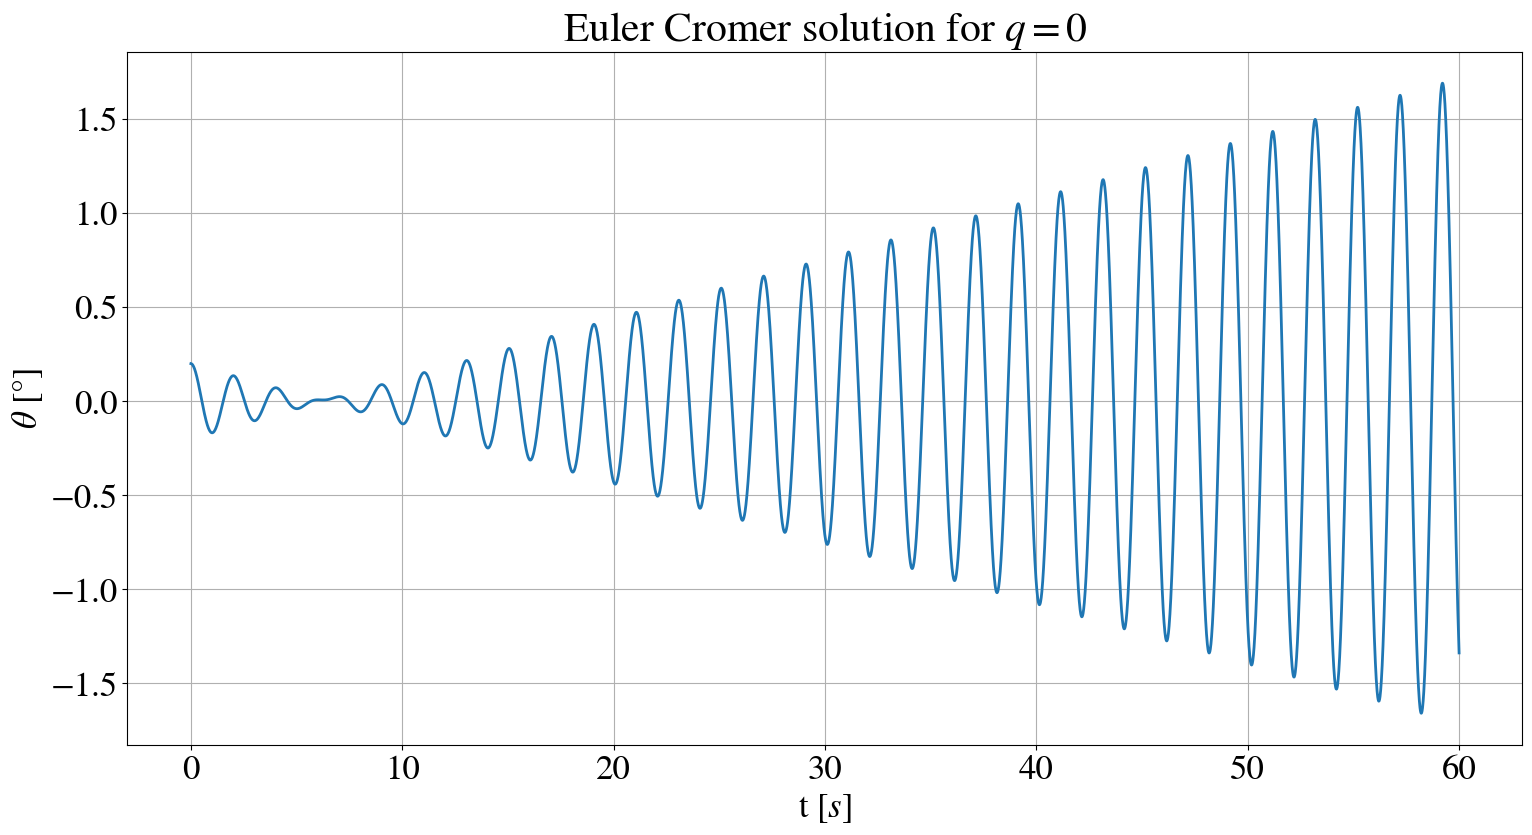

In [10]:
params = {
    "l": 1,  # m - Lengden av snora
    "g": 9.8,  # m/s^2 - Tyngdeakselerasjon
    "theta_0": 0.2,  # rad - Initial vinkel med hensyn til vertikalen
    "theta_dot_0": 0.0,  # rad/s - Initial vinkelhastighet
    "q": 1.0,  # Hz - Friksjonsparameter
    "omega_D": 3.13,  # rad/s - FD_mlens vinkelfrekvens
    "FD_ml": 0.2,  # s^-2 - FD_ml
    "T": 20 # s - Tidsintervall
}

for q in [0.0, 0.5, 1.0, 1.5, 50.0]:
    params['q'] = q

    theta, w, t = RK4_method(equation, params, dt=0.01)

    plt.plot(t, theta, label=r"$q = $" + str(q))
    plt.title(f'Euler Cromer solution for different q')
    plt.xlabel(r't $[s]$')
    plt.ylabel(r'$\theta$ $[\degree]$')
    plt.legend()
    plt.grid()
plt.show()


params['q'] = 0
params['T'] = 60
theta, w, t = RK4_method(equation, params, dt=0.01)
plt.plot(t, theta)
plt.title(f'Euler Cromer solution for $q = 0$')
plt.xlabel(r't $[s]$')
plt.ylabel(r'$\theta$ $[\degree]$')
plt.grid()
plt.show()

    


Koden over løser systemet for ulike verdier av $q$. Plottet øverst viser de ulike løsningene. Resonansamplituden ser ut til å bli lavere for høyere $q$. For $q = 0$ ser det ut til at konvergensamplituden divergerer. Dette kommer spesielt godt fram i det nederste plottet. For store verdier av $q$ når ikke pendelen en resonansfrekvens, og bevegelsen minner om overkritisk dempning.

### Oppgave 5:
For en dempet pendel uten drivkraft, $F_D$ = 0, skiller vi mellom overkritisk, under-kritisk og kritisk dempning. Plot vinkelutslaget opp til $t$ = 4 s, og bestem for hvilke
$q$ vi finner disser regimene

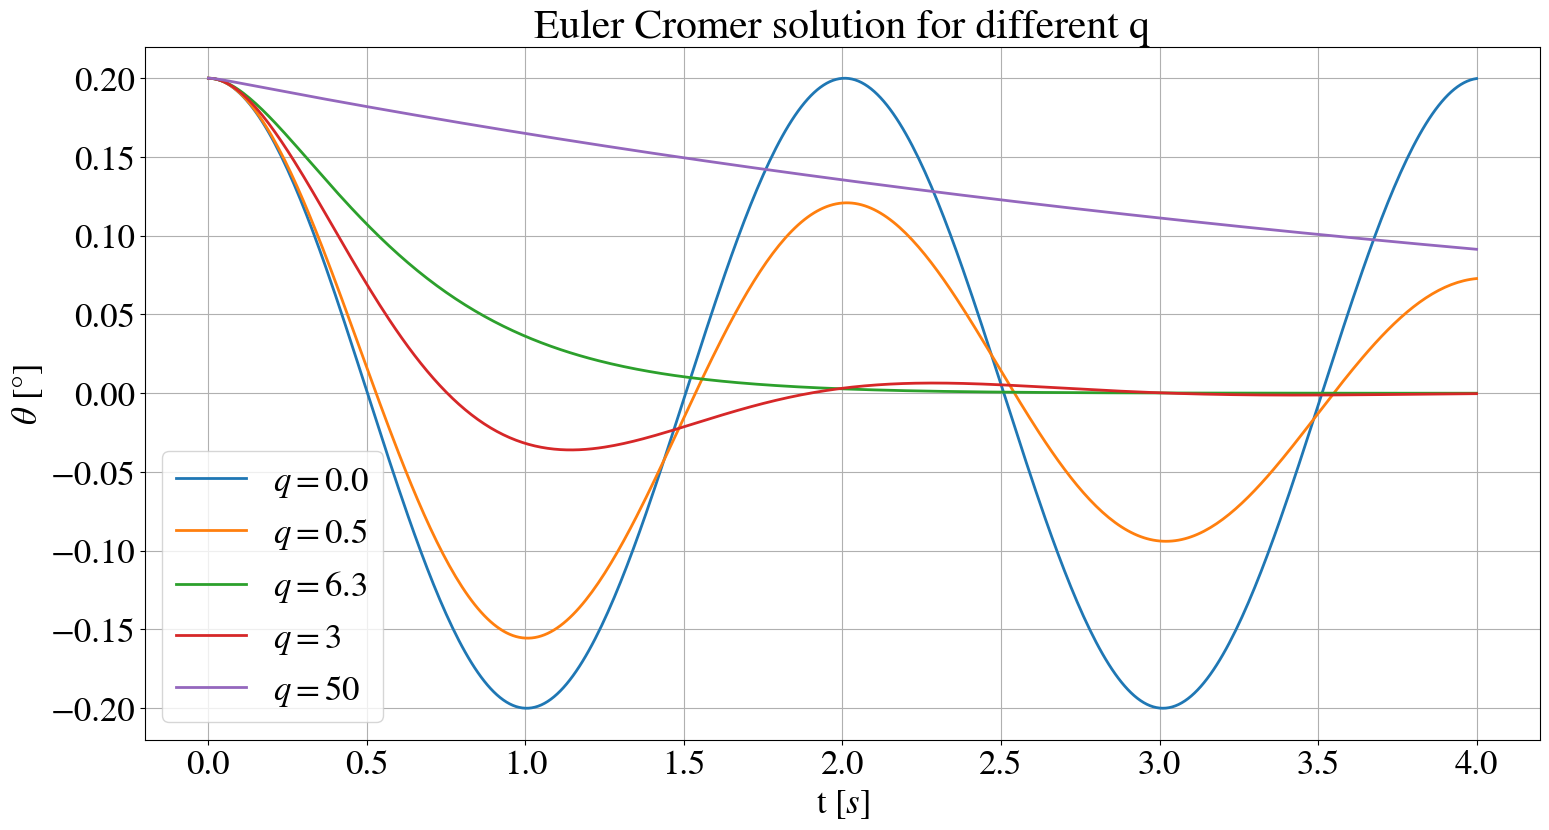

In [11]:
params = {
    "l": 1,  # m - Lengden av snora
    "g": 9.8,  # m/s^2 - Tyngdeakselerasjon
    "theta_0": 0.2,  # rad - Initial vinkel med hensyn til vertikalen
    "theta_dot_0": 0.0,  # rad/s - Initial vinkelhastighet
    "q": 1.0,  # Hz - Friksjonsparameter
    "omega_D": 3.13,  # rad/s - FD_mlens vinkelfrekvens
    "FD_ml": 0.0,  # s^-2 - FD_ml
    "T": 4 # s - Tidsintervall
}
for q in [0.0, 0.5, 2*np.sqrt(9.81), 3, 50]:
    params['q'] = q

    theta, w, t = RK4_method(equation, params, dt=0.01)

    plt.plot(t, theta, label=r"$q = $" + str(round(q,1)))
    plt.title(f'Euler Cromer solution for different q')
    plt.xlabel(r't $[s]$')
    plt.ylabel(r'$\theta$ $[\degree]$')
    plt.legend()
    plt.grid()
plt.show()

Koden over løser systemet for ulike verdier av q, og plotter som vist over. Vi ser fra plottet at for store verdier av q har vi overkritisk demping. For q rundt $2\sqrt{\frac{q}{l}}$ får vi kritisk demping. For små verdier av q får vi underkritisk demping, og for q = 0 er det selvsagt ingen demping.

Dette kommer fra diskriminanten som dukker opp i løsningen av det karakteristiske poynomet fra differentiallikningen.